<a href="https://colab.research.google.com/github/Mustak-Eman/NYC-Property-Sales-EDA/blob/main/Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project uses the NYC Rolling Sales dataset, which contains detailed information about building sales in New York City over a 12-month period. I was interested in this data because it offers insight into real estate trends across different neighborhoods in NYC and allows for an analysis of how location and property size affect sale prices. The dataset was originally sourced from Kaggle and can be downloaded directly from the following link:[NYC Property Sales](https://www.kaggle.com/datasets/new-york-city/nyc-property-sales/data)

---



The data was originally collected by the New York City Department of Finance and includes variables such as borough, neighborhood, building class, land square feet, gross square feet, sale price, and sale date. This dataset provides a rich foundation for exploring housing patterns and understanding the dynamics of property values across New York City.




In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load and clean the data**

In [14]:
nyc_property_sales = pd.read_csv('nyc-rolling-sales[2].csv')
nyc_property_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Before analyzing the dataset, I performed several data cleaning steps to ensure the information was accurate and ready for analysis. In this dataset, missing values were represented by " - " (a space, a dash, or two spaces), so I replaced these entries with proper NaN values and then removed any rows containing missing data. I also checked for and removed duplicate rows to avoid counting the same sale more than once. Next, I cleaned the quantitative columns, such as SALE PRICE, LAND SQUARE FEET, and GROSS SQUARE FEET, by removing any extra characters and converting them from text strings to numeric data types. I then converted the SALE DATE column to a proper date format using pd.to_datetime(). After these steps, the dataset contained only clean, valid values and was ready for exploratory analysis.

In [15]:
nyc_property_sales.shape           # rows, columns

(84548, 22)

In [16]:
nyc_property_sales.info()         # column names, data types, missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [17]:
nyc_property_sales.describe()     # summary stats for numeric columns

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [18]:
nyc_property_sales.replace(' -  ', np.nan, inplace=True)
nyc_property_sales.dropna(inplace=True)
nyc_property_sales.drop_duplicates(inplace=True)

In [19]:
nyc_property_sales.columns = nyc_property_sales.columns.str.strip().str.lower().str.replace(' ', '_')

In [20]:
nyc_property_sales['sale_price'] = nyc_property_sales['sale_price'].str.replace('$', '').str.replace(',', '').astype(float)

In [21]:
nyc_property_sales['land_square_feet'] = nyc_property_sales['land_square_feet'].str.replace(',', '').astype(float)

In [22]:
nyc_property_sales['gross_square_feet'] = nyc_property_sales['gross_square_feet'].str.replace(',', '').astype(float)

In [23]:
nyc_property_sales['sale_date'] = pd.to_datetime(nyc_property_sales['sale_date'])

In [24]:
nyc_property_sales.shape

(48244, 22)

### Single variable distribution plots

In [25]:
clean_prices = nyc_property_sales['sale_price']
clean_prices = clean_prices[(clean_prices >= 20000) & (clean_prices <= 2000000)]


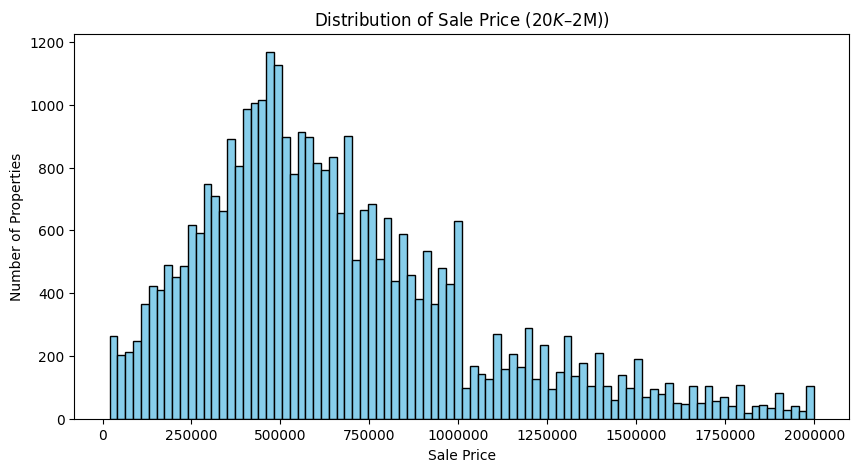

In [26]:
plt.figure(figsize=(10,5))
plt.hist(clean_prices, bins=90, color='skyblue', edgecolor='black')
plt.title("Distribution of Sale Price ($20K – $2M))")
plt.xlabel("Sale Price")
plt.ylabel("Number of Properties")
plt.ticklabel_format(style='plain', axis='x')
plt.show()


The histogram above shows the distribution of sale prices for properties in New York City between $20,000 and $2,000,000. The shape of the distribution is right-skewed, meaning that most properties sold at lower prices, while only a few were sold at higher prices. The highest concentration of sales occurs around $400,000 to $800,000, and the frequency of sales decreases as prices rise.

In [27]:
clean_gross_square_feet = nyc_property_sales['gross_square_feet']
clean_gross_square_feet = clean_gross_square_feet[(clean_gross_square_feet >= 100) & (clean_gross_square_feet <= 8000)]

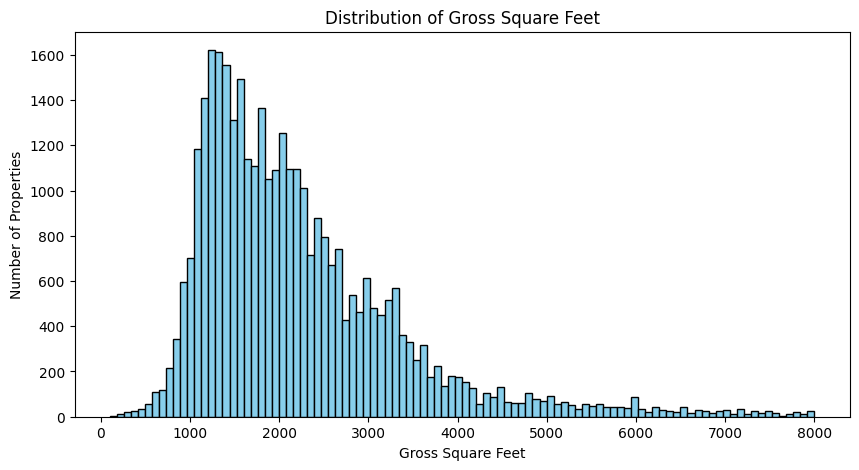

In [28]:
plt.figure(figsize=(10,5))
plt.hist(clean_gross_square_feet, bins=100, color='skyblue', edgecolor='black')
plt.title("Distribution of Gross Square Feet")
plt.xlabel("Gross Square Feet")
plt.ylabel("Number of Properties")
plt.show()

The distribution of gross square feet is right-skewed, with most properties between 1,000 and 2,500 square feet. A few buildings are much larger, creating a long tail on the right side. This shows that smaller residential properties are far more common in NYC, while large buildings make up only a small portion of the dataset.

In [29]:
clean_land_square_feet = nyc_property_sales['land_square_feet']
clean_land_square_feet = clean_land_square_feet[(clean_land_square_feet >= 100) & (clean_land_square_feet <= 6000)]

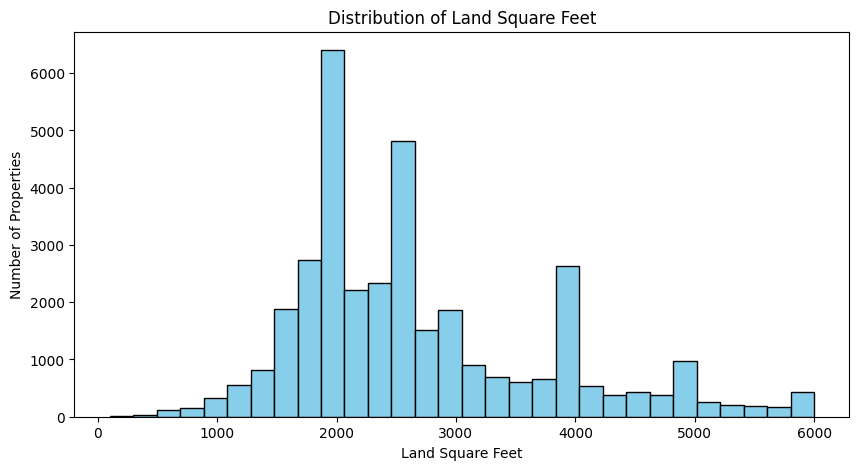

In [30]:
plt.figure(figsize=(10,5))
plt.hist(clean_land_square_feet, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Land Square Feet")
plt.xlabel("Land Square Feet")
plt.ylabel("Number of Properties")
plt.show()

The distribution of land square feet is right-skewed, with most properties having between 1,500 and 3,000 square feet of land. There are a few larger lots that extend the tail to the right. This pattern shows that smaller plots are much more common in New York City, while large parcels of land are relatively rare.

In [31]:
clean_year_built = nyc_property_sales['year_built']
clean_year_built = clean_year_built[(clean_year_built >= 1800) & (clean_year_built <= 2023)]

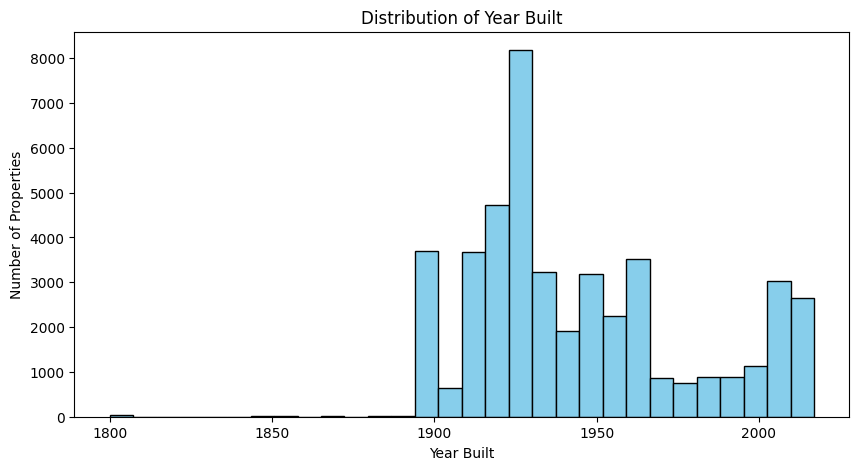

In [32]:
plt.figure(figsize=(10,5))
plt.hist(clean_year_built, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Year Built")
plt.xlabel("Year Built")
plt.ylabel("Number of Properties")
plt.show()

The distribution of year built shows that most properties were constructed between 1900 and 1960, with a noticeable peak around the 1920s. Fewer buildings were built before 1900 or after 2000.

### Multiple variable plots

In [104]:
nyc_property_sales['neighborhood'] = nyc_property_sales['neighborhood'].str.upper().str.strip()

selected = ['SUNSET PARK', 'BENSONHURST', 'ASTORIA']
clean_nyc = nyc_property_sales[
    nyc_property_sales['sale_price'].between(20_000, 2_000_000)
    & nyc_property_sales['gross_square_feet'].between(0, 8_000)
    & nyc_property_sales['land_square_feet'].between(0, 16_000)
    & nyc_property_sales['year_built'].between(1800, 2023)
    & nyc_property_sales['neighborhood'].isin(selected)
].copy()

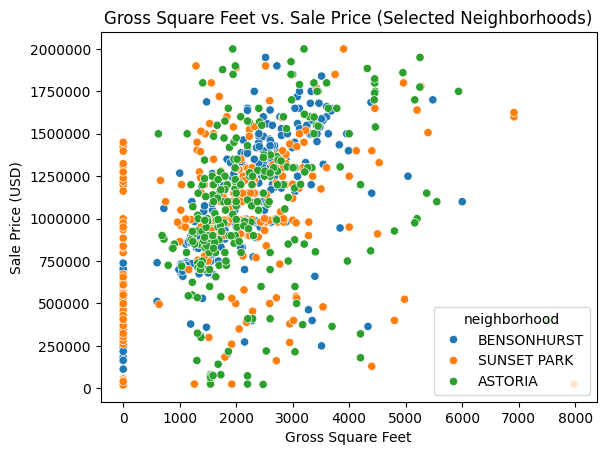

In [103]:
sns.scatterplot(data=clean_nyc, x='gross_square_feet', y='sale_price',hue=clean_nyc['neighborhood'])
plt.title("Gross Square Feet vs. Sale Price (Selected Neighborhoods)")
plt.xlabel("Gross Square Feet")
plt.ylabel("Sale Price (USD)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

This scatterplot compares property sale prices and gross square footage for homes in Bensonhurst, Sunset Park, and Astoria.

There is a positive relationship — larger properties tend to sell for higher prices in all three neighborhoods.

/tmp/ipython-input-2953536932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


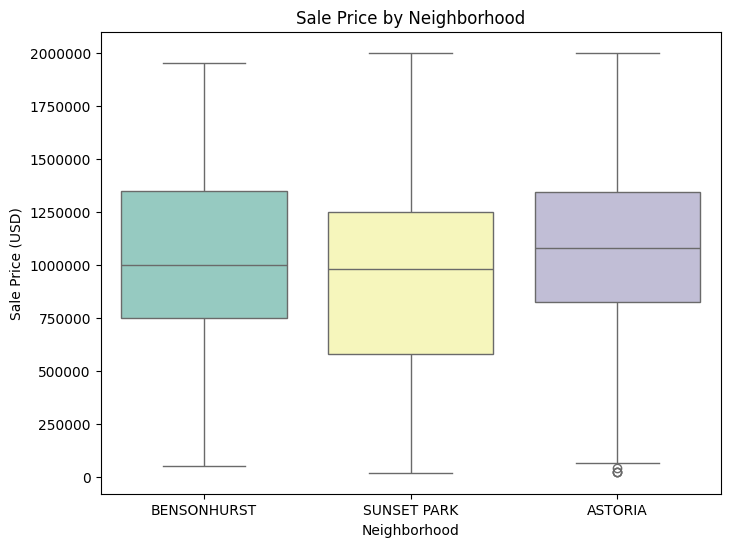

In [113]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=clean_nyc,
    x='neighborhood',
    y='sale_price',
    palette='Set3'
)
plt.title("Sale Price by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price (USD)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()


This boxplot compares property sale prices in Bensonhurst, Sunset Park, and Astoria.
All three neighborhoods have similar overall price ranges, but Astoria shows a slightly higher median and broader distribution, indicating more variation in property values.
Bensonhurst and Sunset Park have tighter price ranges, suggesting more consistent mid-level home prices.
A few low-value outliers appear in Astoria, likely representing smaller or older properties.